In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1> Libraries </h1>


In [3]:
pip install xmljson

In [4]:
import warnings
warnings.filterwarnings("ignore")
import os
import cv2
import numpy as np
from PIL import Image 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import fromstring
from xmljson import parker
import seaborn as sns

<h1> Declaring Paths </h1>

In [5]:
common_path = "/content/drive/MyDrive/Townhall_dataset/OxfordTownCentre"

csv_file = common_path + "/" + os.listdir(common_path)[1]
video_file = common_path + "/" + os.listdir(common_path)[2]

print("Declaring path to raw data :")
print("="*50)
print("common_path :",common_path)
print("csv_file    :",csv_file)
print("video_file  :",video_file)

Declaring path to raw data :
common_path : /content/drive/MyDrive/Townhall_dataset/OxfordTownCentre
csv_file    : /content/drive/MyDrive/Townhall_dataset/OxfordTownCentre/TownCentre-groundtruth.top
video_file  : /content/drive/MyDrive/Townhall_dataset/OxfordTownCentre/TownCentreXVID.mp4


<h1> Frames of the video </h1>


Total Frame Count: 7502
Dummy_image of size (1920, 1080)


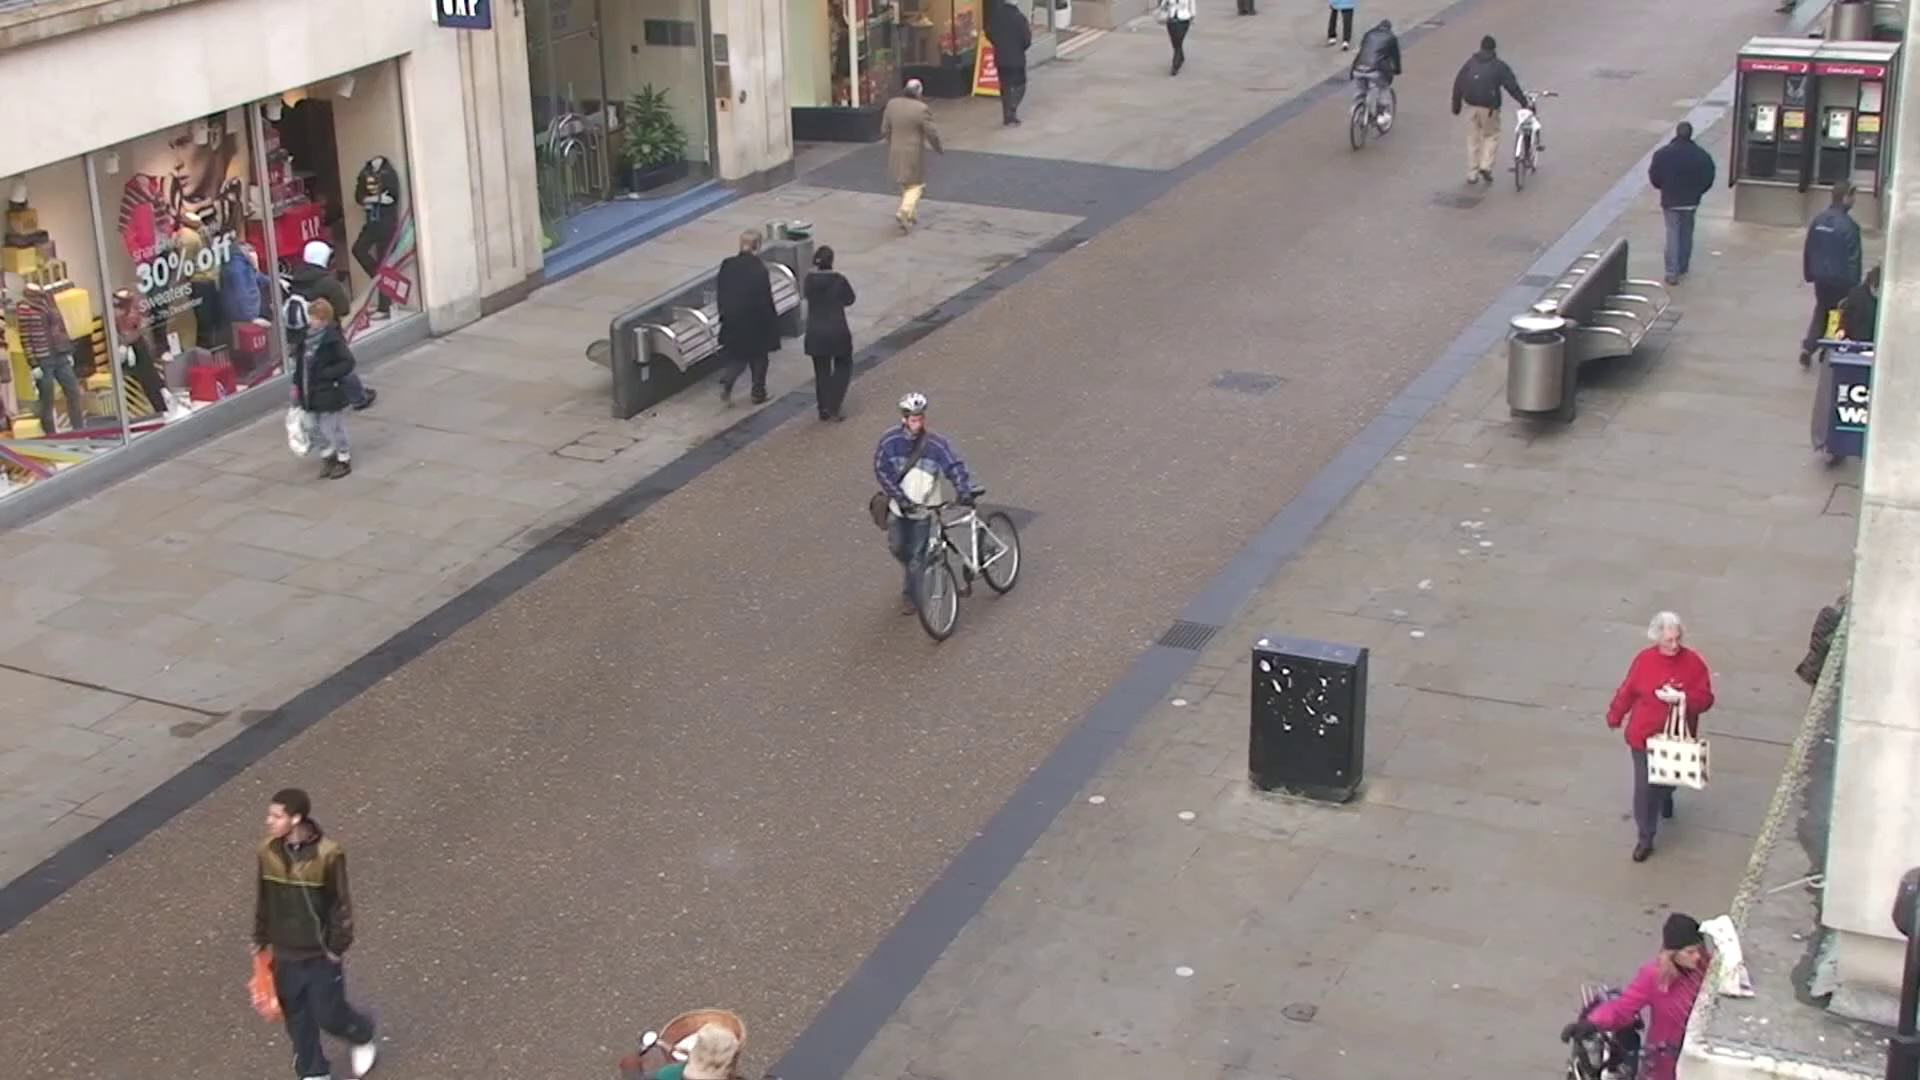

In [ ]:
#Checking for 1 frame and resizing it to 512 X 512
cap = cv2.VideoCapture(video_file)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

check , img = cap.read()
cv2.imwrite("/content/dummy_image" + ".jpg", img)

#Opening Image
im = Image.open("dummy_image.jpg")

print('Total Frame Count:', length )
print("Dummy_image of size {}".format(im.size))
print("="*50)
im

<h1> Observations </h1> 

<p>
Total Frame count of the whole video is 7502 with each image of (1920  X 1080) dimension.
</p>

In [ ]:
#Saving all the images

def video_to_im(path , train_path , val_path , test_path , resize_tuple):
    """
    Converts each frame to a .jpg image and save it to the defined path.
    """
    os.mkdir(common_path + "/" + train_path)
    os.mkdir(common_path + "/" + val_path)
    os.mkdir(common_path + "/" + test_path)

    frame = 0
    cap = cv2.VideoCapture(path)

    while True:
        check , img = cap.read()
        if(check):
            if frame < 3600:
                path =  common_path + "/" + train_path
            
            elif frame >= 3600 and frame < 5000:
                path = common_path + "/" + val_path
            
            else:
                path = common_path + "/" + test_path

            img = cv2.resize(img, resize_tuple)
            cv2.imwrite(os.path.join(path, str(frame) + ".jpg"), img)

            frame += 1
            print("Processed frame :{}".format(frame))
        else:
            break
        
    cap.release()

video_to_im(video_file , "train" , "val" , "test" , (1920 // 2  , 1080 // 2))

Streaming output truncated to the last 5000 lines.
Processed frame :2503
Processed frame :2504
Processed frame :2505
Processed frame :2506
Processed frame :2507
Processed frame :2508
Processed frame :2509
Processed frame :2510
Processed frame :2511
Processed frame :2512
Processed frame :2513
Processed frame :2514
Processed frame :2515
Processed frame :2516
Processed frame :2517
Processed frame :2518
Processed frame :2519
Processed frame :2520
Processed frame :2521
Processed frame :2522
Processed frame :2523
Processed frame :2524
Processed frame :2525
Processed frame :2526
Processed frame :2527
Processed frame :2528
Processed frame :2529
Processed frame :2530
Processed frame :2531
Processed frame :2532
Processed frame :2533
Processed frame :2534
Processed frame :2535
Processed frame :2536
Processed frame :2537
Processed frame :2538
Processed frame :2539
Processed frame :2540
Processed frame :2541
Processed frame :2542
Processed frame :2543
Processed frame :2544
Processed frame :2545
Pro

<h2> Declaring paths <h1>

In [ ]:
train = common_path + "/" + "train"
val = common_path + "/" + "val"
test = common_path + "/" + "test"

#split Ratio
print("Split Ratio :")
print("="*50)
print("train : {} that is {} % of the whole data".format(len(os.listdir(train)) , len(os.listdir(train)) / length) )
print("val   : {} that is {} % of the whole data".format(len(os.listdir(val)) , len(os.listdir(val)) / length) )
print("test  : {} that is {} % of the whole data".format(len(os.listdir(test)) , len(os.listdir(test)) / length) )

Split Ratio :
train : 3600 that is 0.4798720341242335 % of the whole data
val   : 1400 that is 0.18661690215942414 % of the whole data
test  : 2502 that is 0.3335110637163423 % of the whole data


<h1> Annotations </h1>

In [ ]:
GT = pd.read_csv(csv_file , header=None)
GT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47747 entries, 0 to 47746
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47747 non-null  int64  
 1   1       47747 non-null  int64  
 2   2       47747 non-null  int64  
 3   3       47747 non-null  int64  
 4   4       47747 non-null  float64
 5   5       47747 non-null  float64
 6   6       47747 non-null  float64
 7   7       47747 non-null  float64
 8   8       47747 non-null  float64
 9   9       47747 non-null  float64
 10  10      47747 non-null  float64
 11  11      47746 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 4.4 MB


<pre>
Observation on Annotation :

    In the raw data the annotations are given in csv format.

    column[1] --> frame_number
    column[8] --> x1_point_bb
    column[11] --> y1_point_bb
    column[10] --> x2_point_bb
    column[9] --> y2_point_bb
<pre>

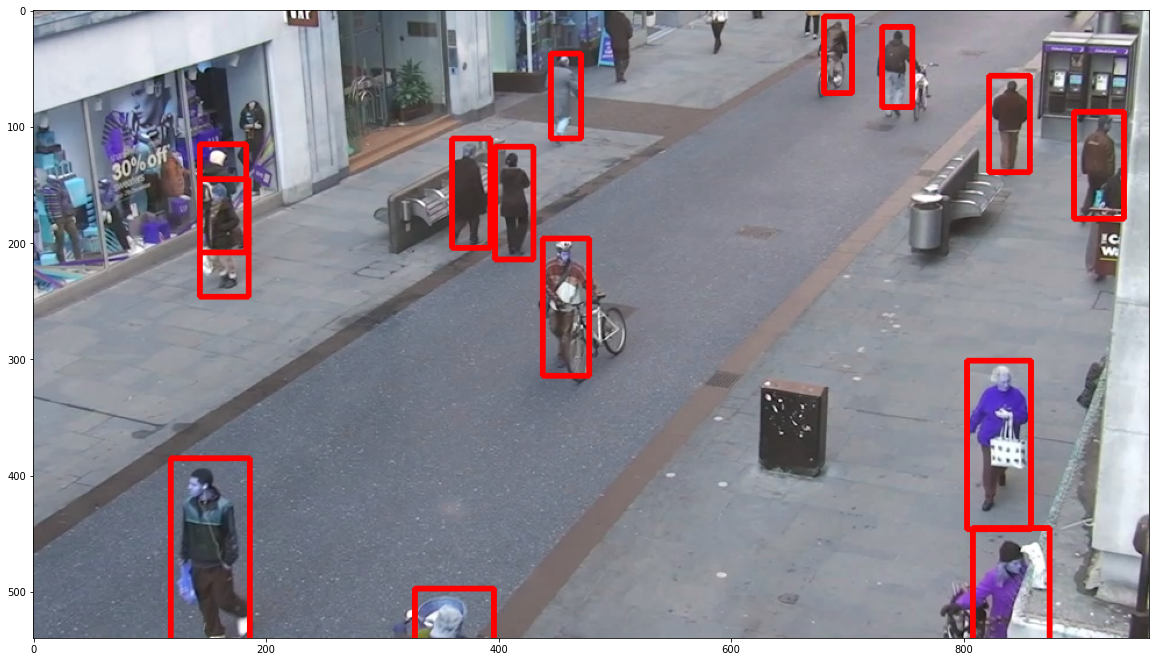

In [ ]:
#For frame 0 getting absolute points and plotting boxes on the frame

Frame = GT.loc[GT[1] == 0]

x1 = list(Frame[8])
y1 = list(Frame[11])
x2 = list(Frame[10])
y2 = list(Frame[9])


points = [[(round(x1_), round(y1_)), (round(x2_), round(y2_))] for x1_,y1_,x2_,y2_ in zip(x1,y1,x2,y2)]
points
factor = 2
absolute_points = []
for point in points:

    top_left = point[0]
    bottom_right = point[1]

    if top_left[0] > bottom_right[0]:
        xmax, xmin = top_left[0] // factor, bottom_right[0] // factor
    else:
        xmin, xmax = top_left[0] // factor, bottom_right[0] // factor

    if top_left[1] > bottom_right[1]:
        ymax, ymin = top_left[1] // factor, bottom_right[1] // factor
    else:
        ymin, ymax = top_left[1] // factor, bottom_right[1] // factor

    absolute_points.append([(xmin , ymin) , (xmax , ymax)])



#opening image and plotting Bounding-Boxes.
image = cv2.imread(train + "/" + "0.jpg")

for box in absolute_points:
    xmax, xmin, ymax, ymin= box[1][0], box[0][0], box[1][1], box[0][1] 
    
    image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0) , 3)

plt.figure(figsize=(20,20))

plt.imshow(image)

In [ ]:
#Removing NANs from the dataset.
GT = GT.dropna(axis = 0)
GT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47746 entries, 0 to 47745
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47746 non-null  int64  
 1   1       47746 non-null  int64  
 2   2       47746 non-null  int64  
 3   3       47746 non-null  int64  
 4   4       47746 non-null  float64
 5   5       47746 non-null  float64
 6   6       47746 non-null  float64
 7   7       47746 non-null  float64
 8   8       47746 non-null  float64
 9   9       47746 non-null  float64
 10  10      47746 non-null  float64
 11  11      47746 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 4.7 MB


<h1>Creating XML for the frames </h1>

In [ ]:
#Reference : https://github.com/thatbrguy/Pedestrian-Detection/blob/master/extract_GT.py

indent = lambda x,y: ''.join(['  ' for _ in range(y)]) + x

factor = 2
train_size = 3600

os.mkdir(common_path + "/" + 'xmls')
name = 'pedestrian'
width, height = 1920 // factor, 1080 // factor

for frame_number in tqdm(range(train_size)):
        
    Frame = GT.loc[GT[1] == frame_number] 
    x1 = list(Frame[8])
    y1 = list(Frame[11])
    x2 = list(Frame[10])
    y2 = list(Frame[9])
    points = [[(round(x1_), round(y1_)), (round(x2_), round(y2_))] for x1_,y1_,x2_,y2_ in zip(x1,y1,x2,y2)]

    with open(os.path.join(common_path + "/" + 'xmls',str(frame_number) + '.xml'), 'w') as file:
        file.write('<annotation>\n')
        file.write(indent('<filename>' + str(frame_number) + '.jpg' + '</filename>\n', 1))
        file.write(indent('<size>\n', 1))
        file.write(indent('<width>' + str(width) + '</width>\n', 2))
        file.write(indent('<height>' + str(height) + '</height>\n', 2))
        file.write(indent('<depth>3</depth>\n', 2))
        file.write(indent('</size>\n', 1))

        for point in points:

            top_left = point[0]
            bottom_right = point[1]

            if top_left[0] > bottom_right[0]:
                xmax, xmin = top_left[0] // factor, bottom_right[0] // factor
            else:
                xmin, xmax = top_left[0] // factor, bottom_right[0] // factor

            if top_left[1] > bottom_right[1]:
                ymax, ymin = top_left[1] // factor, bottom_right[1] // factor
            else:
                ymin, ymax = top_left[1] // factor, bottom_right[1] // factor

            file.write(indent('<object>\n', 1))
            file.write(indent('<name>' + name + '</name>\n', 2))
            file.write(indent('<bndbox>\n', 2))
            file.write(indent('<xmin>' + str(xmin) + '</xmin>\n', 3))
            file.write(indent('<ymin>' + str(ymin) + '</ymin>\n', 3))
            file.write(indent('<xmax>' + str(xmax) + '</xmax>\n', 3))
            file.write(indent('<ymax>' + str(ymax) + '</ymax>\n', 3))
            file.write(indent('</bndbox>\n', 2))
            file.write(indent('</object>\n', 1))


        file.write('</annotation>\n')
        
    

<h2> Analysis on xml files </h2>

In [6]:
xml_path = common_path + "/" + "xmls"

print("No. of total XML files are {} == no. of train files.".format(len(os.listdir(xml_path))))

No. of total XML files are 3600 == no. of train files.


<h3> Bounding Boxes </h3>

In [ ]:
def keep_keys(old_dict):
  new_dict = {}
  for key in old_dict:
    if key in ["object","segmented","size"]:
      new_dict[key]=old_dict[key]
  return new_dict

no_of_boxes = []
for i in tqdm(range(0 , 3600)):
    xmlfile = xml_path + "/" + str(i) + ".xml"
    f = open(xmlfile , "rb")

    try:
        no_of_boxes.append(len(keep_keys(parker.data(fromstring(f.read())))["object"]))
    except:
        continue


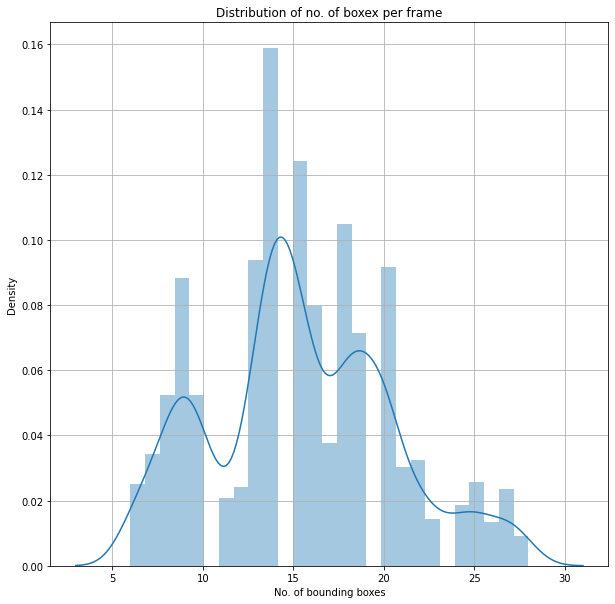

In [ ]:
plt.figure(figsize=(10,10))

plt.xlabel("No. of bounding boxes")
plt.title("Distribution of no. of boxex per frame")
sns.distplot(no_of_boxes)
plt.grid(True)

<h1> Observation </h1> 

<p>
    The maximum number of object found in the frame is 30 and the maximum value count of number of objects in the frame is 13.
</p>